<a href="https://colab.research.google.com/github/Toni-Navarro/deep-learning/blob/master/Q-learning/Hello_World.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Game design

The game the Q-agents will need to learn is made of a board with 4 cells. The agent will receive a +1 reward every time it fills a vacant cell, and will receive a -1 penalty when it tries to fill an already filled cell. Game ends when the board is full.


[
Q Learning & Deep Q Network Examples](https://github.com/shakedzy/notebooks/blob/master/q_learning_and_dqn/Q%20Learning%20and%20Deep%20Q%20Network.ipynb)

In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import deque
from time import time

In [0]:
seed = 1546847731  # or try a new seed by using: seed = int(time())
random.seed(seed)
print('Seed: {}'.format(seed))

Seed: 1546847731


In [0]:
class Game:
    board = None
    board_size = 0
    
    def __init__(self, board_size=4):
        self.board_size = board_size
        self.reset()
    
    def reset(self):
        self.board = np.zeros(self.board_size)
    
    def play(self, cell):
        # returns a tuple: (reward, game_over?)
        if self.board[cell] == 0:
            self.board[cell] = 1
            game_over = len(np.where(self.board == 0)[0]) == 0
            return (1,game_over)
        else:
            return (-1,False)

In [0]:
def state_to_str(state):
    return str(list(map(int,state.tolist())))

all_states = list()
for i in range(2):
    for j in range(2):
        for k in range(2):
            for l in range(2):
                s = np.array([i,j,k,l])
                all_states.append(state_to_str(s))
                
print('All possible states:')
for s in all_states:
    print(s)

All possible states:
[0, 0, 0, 0]
[0, 0, 0, 1]
[0, 0, 1, 0]
[0, 0, 1, 1]
[0, 1, 0, 0]
[0, 1, 0, 1]
[0, 1, 1, 0]
[0, 1, 1, 1]
[1, 0, 0, 0]
[1, 0, 0, 1]
[1, 0, 1, 0]
[1, 0, 1, 1]
[1, 1, 0, 0]
[1, 1, 0, 1]
[1, 1, 1, 0]
[1, 1, 1, 1]


In [0]:
game = Game()

In [0]:
num_of_games = 2000
epsilon = 0.1
gamma = 1

In [0]:
q_table = pd.DataFrame(0, index=np.arange(4), columns=all_states)

In [0]:
print(q_table)

   [0, 0, 0, 0]  [0, 0, 0, 1]  ...  [1, 1, 1, 0]  [1, 1, 1, 1]
0             0             0  ...             0             0
1             0             0  ...             0             0
2             0             0  ...             0             0
3             0             0  ...             0             0

[4 rows x 16 columns]


In [0]:
r_list = []  # store the total reward of each game so we can plot it later

for g in range(num_of_games):
    game_over = False
    game.reset()
    total_reward = 0
    while not game_over:
        state = np.copy(game.board)
        if random.random() < epsilon:
            action = random.randint(0,3)
        else:
            action = q_table[state_to_str(state)].idxmax()
        reward, game_over = game.play(action)
        total_reward += reward
        if np.sum(game.board) == 4:  # terminal state
            next_state_max_q_value = 0
        else:
            next_state = np.copy(game.board)
            next_state_max_q_value = q_table[state_to_str(next_state)].max()
        q_table.loc[action,state_to_str(state)] = reward + gamma * next_state_max_q_value
    r_list.append(total_reward)
q_table

,"[0, 0, 0, 0]","[0, 0, 0, 1]","[0, 0, 1, 0]","[0, 0, 1, 1]","[0, 1, 0, 0]","[0, 1, 0, 1]","[0, 1, 1, 0]","[0, 1, 1, 1]","[1, 0, 0, 0]","[1, 0, 0, 1]","[1, 0, 1, 0]","[1, 0, 1, 1]","[1, 1, 0, 0]","[1, 1, 0, 1]","[1, 1, 1, 0]","[1, 1, 1, 1]"
0,4,3,3,2,3,2,2,0,2,1,1,-1,1,0,0,0
1,4,1,0,0,0,0,0,0,3,2,2,1,1,0,0,0
2,4,3,2,0,3,0,-1,0,3,2,1,0,2,1,0,0
3,4,2,3,0,0,0,0,0,3,0,2,0,2,0,1,0


In [0]:
for i in range(2):
    for j in range(2):
        for k in range(2):
            for l in range(2):
                b = np.array([i,j,k,l])
                if len(np.where(b == 0)[0]) != 0:
                    action = q_table[state_to_str(b)].idxmax()
                    pred = q_table[state_to_str(b)].tolist()
                    print('board: {b}\tpredicted Q values: {p} \tbest action: {a}\tcorrect action? {s}'
                          .format(b=b,p=pred,a=action,s=b[action]==0))

board: [0 0 0 0]	predicted Q values: [4, 4, 4, 4] 	best action: 0	correct action? True
board: [0 0 0 1]	predicted Q values: [3, 1, 3, 2] 	best action: 0	correct action? True
board: [0 0 1 0]	predicted Q values: [3, 0, 2, 3] 	best action: 0	correct action? True
board: [0 0 1 1]	predicted Q values: [2, 0, 0, 0] 	best action: 0	correct action? True
board: [0 1 0 0]	predicted Q values: [3, 0, 3, 0] 	best action: 0	correct action? True
board: [0 1 0 1]	predicted Q values: [2, 0, 0, 0] 	best action: 0	correct action? True
board: [0 1 1 0]	predicted Q values: [2, 0, -1, 0] 	best action: 0	correct action? True
board: [0 1 1 1]	predicted Q values: [0, 0, 0, 0] 	best action: 0	correct action? True
board: [1 0 0 0]	predicted Q values: [2, 3, 3, 3] 	best action: 1	correct action? True
board: [1 0 0 1]	predicted Q values: [1, 2, 2, 0] 	best action: 1	correct action? True
board: [1 0 1 0]	predicted Q values: [1, 2, 1, 2] 	best action: 1	correct action? True
board: [1 0 1 1]	predicted Q values: [-1, 

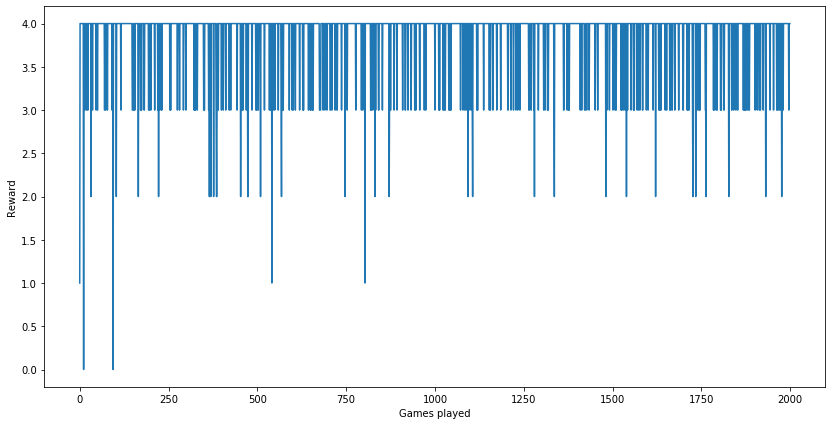

In [0]:
plt.figure(figsize=(14,7))
plt.plot(range(len(r_list)),r_list)
plt.xlabel('Games played')
plt.ylabel('Reward')
plt.show()

#Deep Q Network

In [0]:
class QNetwork:
    def __init__(self, hidden_layers_size, gamma, learning_rate, input_size=4, output_size=4):
        self.q_target = tf.placeholder(shape=(None,output_size), dtype=tf.float32)
        self.r = tf.placeholder(shape=None,dtype=tf.float32)
        self.states = tf.placeholder(shape=(None, input_size), dtype=tf.float32)
        self.enum_actions = tf.placeholder(shape=(None,2), dtype=tf.int32) 
        layer = self.states
        for l in hidden_layers_size:
            layer = tf.layers.dense(inputs=layer, units=l, activation=tf.nn.relu,
                                    kernel_initializer=tf.contrib.layers.xavier_initializer(seed=seed))
        self.output = tf.layers.dense(inputs=layer, units=output_size,
                                      kernel_initializer=tf.contrib.layers.xavier_initializer(seed=seed))
        self.predictions = tf.gather_nd(self.output,indices=self.enum_actions)
        self.labels = self.r + gamma * tf.reduce_max(self.q_target, axis=1)
        self.cost = tf.reduce_mean(tf.losses.mean_squared_error(labels=self.labels, predictions=self.predictions))
        self.optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(self.cost)

In [0]:
class ReplayMemory:
    memory = None
    counter = 0

    def __init__(self, size):
        self.memory = deque(maxlen=size)

    def append(self, element):
        self.memory.append(element)
        self.counter += 1

    def sample(self, n):
        return random.sample(self.memory, n)

In [0]:
num_of_games = 2000
epsilon = 0.1
gamma = 0.99
batch_size = 10
memory_size = 2000

In [0]:
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [0]:
tf.reset_default_graph()
tf.set_random_seed(seed)
qnn = QNetwork(hidden_layers_size=[20,20], gamma=gamma, learning_rate=0.001)
memory = ReplayMemory(memory_size)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
class ReplayMemory:
    memory = None
    counter = 0

    def __init__(self, size):
        self.memory = deque(maxlen=size)

    def append(self, element):
        self.memory.append(element)
        self.counter += 1

    def sample(self, n):
        return random.sample(self.memory, n)

In [0]:
num_of_games = 2000
epsilon = 0.1
gamma = 0.99
batch_size = 10
memory_size = 2000

In [0]:


tf.reset_default_graph()
tf.set_random_seed(seed)
qnn = QNetwork(hidden_layers_size=[20,20], gamma=gamma, learning_rate=0.001)
memory = ReplayMemory(memory_size)
sess = tf.Session()
sess.run(tf.global_variables_initializer())



In [0]:
r_list = []  
c_list = []  # same as r_list, but for the cost

counter = 0  # will be used to trigger network training

for g in range(num_of_games):
    game_over = False
    game.reset()
    total_reward = 0
    while not game_over:
        counter += 1
        state = np.copy(game.board)
        if random.random() < epsilon:
            action = random.randint(0,3)
        else:
            pred = np.squeeze(sess.run(qnn.output,feed_dict={qnn.states: np.expand_dims(game.board,axis=0)}))
            action = np.argmax(pred)
        reward, game_over = game.play(action)
        total_reward += reward
        next_state = np.copy(game.board)
        memory.append({'state':state,'action':action,'reward':reward,'next_state':next_state,'game_over':game_over})
        if counter % batch_size == 0:
            # Network training
            batch = memory.sample(batch_size)
            q_target = sess.run(qnn.output,feed_dict={qnn.states: np.array(list(map(lambda x: x['next_state'], batch)))})
            terminals = np.array(list(map(lambda x: x['game_over'], batch)))
            for i in range(terminals.size):
                if terminals[i]:
                    # Remember we use the network's own predictions for the next state while calculatng loss.
                    # Terminal states have no Q-value, and so we manually set them to 0, as the network's predictions
                    # for these states is meaningless
                    q_target[i] = np.zeros(game.board_size)
            _, cost = sess.run([qnn.optimizer, qnn.cost], 
                               feed_dict={qnn.states: np.array(list(map(lambda x: x['state'], batch))),
                               qnn.r: np.array(list(map(lambda x: x['reward'], batch))),
                               qnn.enum_actions: np.array(list(enumerate(map(lambda x: x['action'], batch)))),
                               qnn.q_target: q_target})
            c_list.append(cost)
    r_list.append(total_reward)
print('Final cost: {}'.format(c_list[-1]))

Final cost: 1.0163472890853882


In [0]:
for i in range(2):
    for j in range(2):
        for k in range(2):
            for l in range(2):
                b = np.array([i,j,k,l])
                if len(np.where(b == 0)[0]) != 0:
                    pred = np.squeeze(sess.run(qnn.output,feed_dict={qnn.states: np.expand_dims(b,axis=0)}))
                    pred = list(map(lambda x: round(x,3),pred))
                    action = np.argmax(pred)
                    print('board: {b}\tpredicted Q values: {p} \tbest action: {a}\tcorrect action? {s}'
                          .format(b=b,p=pred,a=action,s=b[action]==0))

board: [0 0 0 0]	predicted Q values: [0.316, 0.036, 0.172, -0.353] 	best action: 0	correct action? True
board: [0 0 0 1]	predicted Q values: [-0.343, -0.881, -0.185, -1.364] 	best action: 2	correct action? True
board: [0 0 1 0]	predicted Q values: [0.311, 0.753, -0.332, -0.009] 	best action: 1	correct action? True
board: [0 0 1 1]	predicted Q values: [0.118, 0.273, -0.558, -0.772] 	best action: 1	correct action? True
board: [0 1 0 0]	predicted Q values: [0.458, -0.038, 0.225, -0.068] 	best action: 0	correct action? True
board: [0 1 0 1]	predicted Q values: [0.255, -0.866, 0.019, -1.028] 	best action: 0	correct action? True
board: [0 1 1 0]	predicted Q values: [0.468, 0.476, 0.15, 0.51] 	best action: 3	correct action? True
board: [0 1 1 1]	predicted Q values: [0.892, 0.211, -0.061, -0.08] 	best action: 0	correct action? True
board: [1 0 0 0]	predicted Q values: [-0.081, 0.168, 0.48, -0.011] 	best action: 2	correct action? True
board: [1 0 0 1]	predicted Q values: [-0.899, -0.586, 0.144,

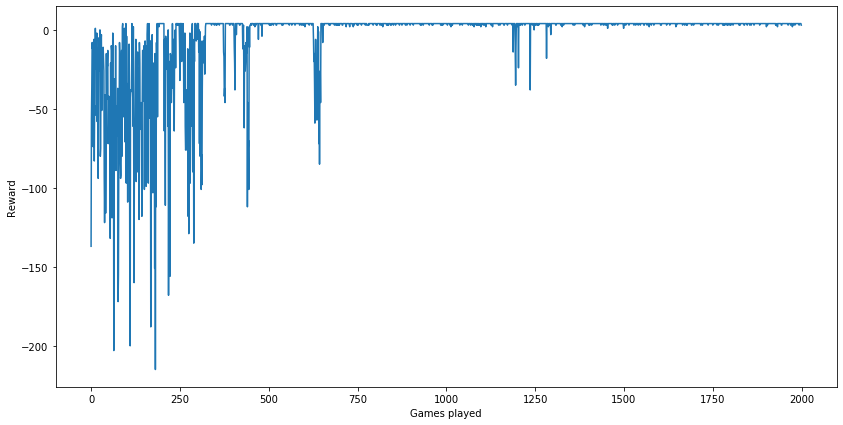

In [0]:
plt.figure(figsize=(14,7))
plt.plot(range(len(r_list)),r_list)
plt.xlabel('Games played')
plt.ylabel('Reward')
plt.show()

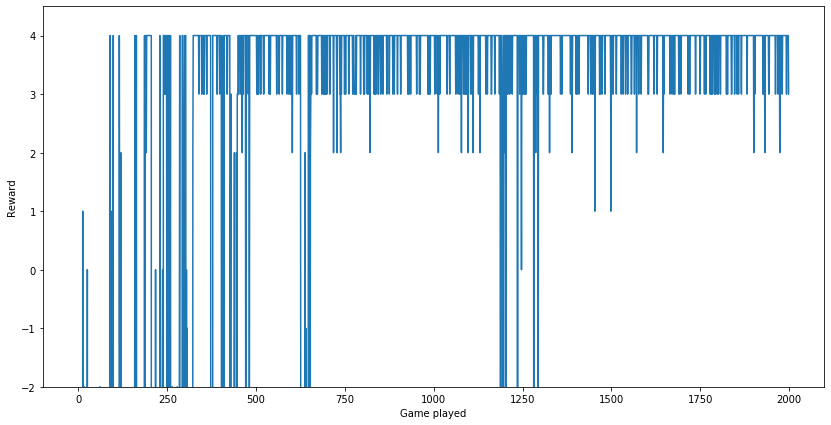

In [0]:
plt.figure(figsize=(14,7))
plt.plot(range(len(r_list)),r_list)
plt.xlabel('Game played')
plt.ylabel('Reward')
plt.ylim(-2,4.5)
plt.show()

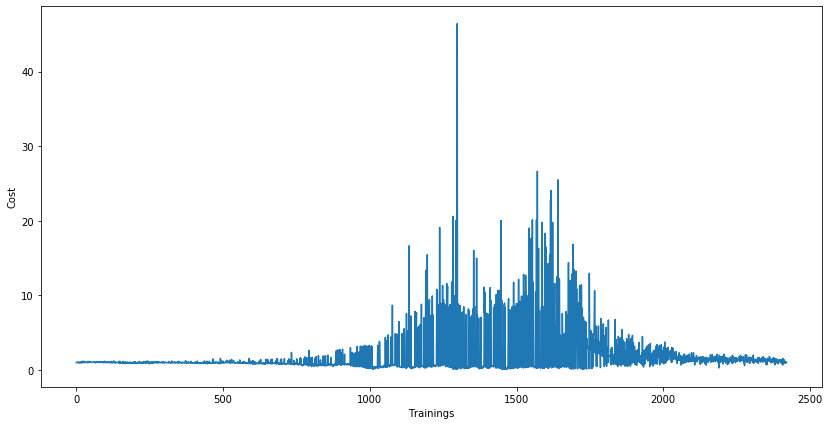

In [0]:
plt.figure(figsize=(14,7))
plt.plot(range(len(c_list)),c_list)
plt.xlabel('Trainings')
plt.ylabel('Cost')
plt.show()

In [0]:
sess.close()  # Don't forget to close tf.session